In [0]:
import random
from tensorflow.keras.utils import to_categorical
import keras
from tensorflow.python.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.callbacks import  ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as img
import numpy as np
import pandas as pd
import cv2
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Dataset
downloaded = drive.CreateFile({'id':"1N7LjNc22CF8NnWZIq0uum3ukKDlawHpA"})   # replace the id with id of file you want to access
downloaded.GetContentFile('fashion-mnist_train.csv')        # replace the file name with your file

In [0]:
#Dataset
downloaded = drive.CreateFile({'id':"1L6Ka8UNvAmNEbxLRotBUy9fAefNR1Qbv"})   # replace the id with id of file you want to access
downloaded.GetContentFile('fashion-mnist_test.csv')        # replace the file name with your file

In [0]:
#loading Dataset
train = pd.read_csv('fashion-mnist_train.csv')

In [0]:
test = pd.read_csv('fashion-mnist_test.csv')

In [0]:
trainY = train['label']

In [0]:
testY = test['label']

In [0]:
trainX_cols = []
for i in range(1 ,785) :
  trainX_cols.append('pixel' + str(i))

In [0]:
trainX = train[trainX_cols]

In [0]:
testX = test[trainX_cols]

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(trainX, trainY, test_size=0.1)

In [0]:
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_train_reshaped = X_train.reshape(54000, 28, 28, 1)
X_train_no_reshape = X_train.reshape(54000, 28, 28)
X_valid_reshaped = X_valid.reshape(6000, 28, 28, 1)
X_train_no_reshape = X_valid.reshape(6000, 28, 28)

In [0]:
image = cv2.copyMakeBorder(X_train_no_reshape[0] , top, bottom, left, right, borderType)

In [0]:
X_test = np.array(testX)
X_test_reshaped = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)

In [0]:
y_test=to_categorical(testY)

In [0]:
input_shape=(28, 28, 1)

In [0]:
#Define Model
model=Sequential()
model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(
      rotation_range=8,
      width_shift_range=0.08,
      height_shift_range=0.08,
      shear_range = 0.3,
      zoom_range = 0.08)

In [0]:
train_generator = train_datagen.flow(
         X_train_reshaped , 
         y_train ,
        batch_size= 128)

In [0]:
validation_generator = train_datagen.flow(
        X_valid_reshaped,
        y_valid,
        batch_size=128,)

In [0]:
model.load_weights("/content/drive/My Drive/fashion_mnist_checkpoints")

In [0]:
checkpoint_path = "/content/drive/My Drive/fashion_mnist_checkpoints"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history=model.fit_generator(train_generator, 
                    steps_per_epoch=y_train.shape[0]//128, 
                    epochs=50, 
                    validation_data = validation_generator,
                    validation_steps=y_valid.shape[0]//128,
                    callbacks=[cp_callback]
                    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
421/421 [==============================] - ETA: 0s - loss: 0.2519 - accuracy: 0.9061
Epoch 00001: saving model to /content/drive/My Drive/fashion_mnist_checkpoints
421/421 [==============================] - 257s 611ms/step - loss: 0.2519 - accuracy: 0.9061 - val_loss: 0.2489 - val_accuracy: 0.9091
Epoch 2/50
421/421 [==============================] - ETA: 0s - loss: 0.2522 - accuracy: 0.9066
Epoch 00002: saving model to /content/drive/My Drive/fashion_mnist_checkpoints
421/421 [==============================] - 261s 619ms/step - loss: 0.2522 - accuracy: 0.9066 - val_loss: 0.2290 - val_accuracy: 0.9158
Epoch 3/50
421/421 [==============================] - ETA: 0s - loss: 0.2519 - accuracy: 0.9058
Epoch 00003: saving model to /content/drive/My Drive/fashion_mnist_checkpoints
421/421 [==============================] - 257s 610ms/step - loss: 0.2519 - accuracy: 0.9058 - val_loss: 0.2439 - val_accuracy: 0

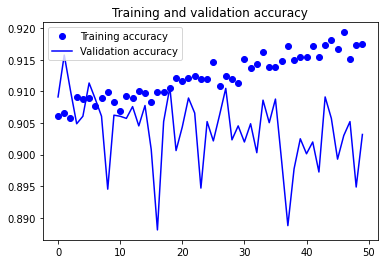

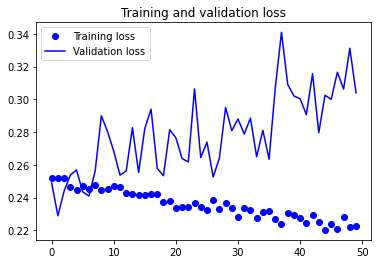

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
prediction=model.predict(X_test_reshaped)

In [0]:
score = model.evaluate(X_test_reshaped, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3221280872821808
Test accuracy: 0.9118000268936157


In [0]:
pred_labels = np.argmax(prediction, axis=-1)    

In [0]:
test_labels= np.argmax(y_test, axis=-1)  

In [0]:
#Precision/Recall
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.85      0.88      0.87      1000
           3       0.90      0.92      0.91      1000
           4       0.90      0.81      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.75      0.76      0.75      1000
           7       0.97      0.96      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


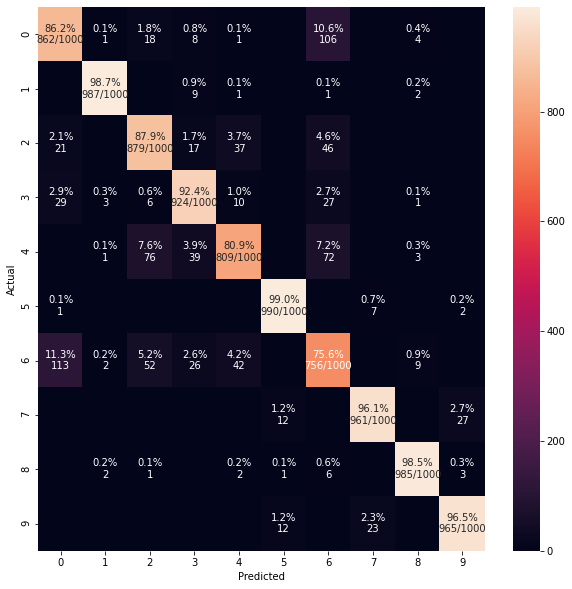

In [0]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    
plot_cm(test_labels, pred_labels)